# DECISION TREE ALGORITHM.

Decision tree algorithm is a type of supervised machine learning model that classifies data by using true or false values to questions. It one of the simplest and most accurate model that when visualised gives a hierachial tree structure with three types of nodes ; root, internal node and leafs. Its a graphical representation showing all possible solutions for a given problem based on a condition. 

<img src="../images/decision tree.png" width=800px height=300px />


The **root node** sits at the top as a starting point as parent, it represents the whole dataset or population from which a decision will be made resulting to a split. The root is the most critical part as it sets the foundation for branching aimed at making separations that give birth to child nodes with the highest purity.  

**Decision/internal nodes** are decisions upon which datasets are split. They are test conducted based on the features of the dataset. A question is asked and then based on the answers provided, a tree is split further into sub-branches. A split is characterised by a feature that best separates the data according to certain criterion i.e informtaion gain(entropy), Gini Impurity, and variance reduction.

**Leaf Node** is a final ouput node that represent an outcome made. These terminal node represent a point upon which no further split in the dataset can be made, here the tree is considered as fully grown. For classification trees they represent classes while in regression thet represent contionous values often mean values of the target variable. 

**Feature selection** is an important step in decison trees where all possible splits are considered and one that result to best feature separation based on a criterion is selected. A decision node is split into subnodes also called child nodes. In classifiction data is separated into classes while in regression variance is reduced. 

Sometimes unneccessary branches can be removed by **pruning**. These are ones that have little to no impact on the accuracy of the model, this step improve the model generalisation abilities on new data and curbs overfitting.

Lets use this algorithm to predict voter turn out in the United States county election.  

In [1]:
# Import Required libraries. 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Distance measurements 
from sklearn.neighbors import BallTree
from shapely.geometry import LineString

# Machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, classification_report
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


(3108, 88)


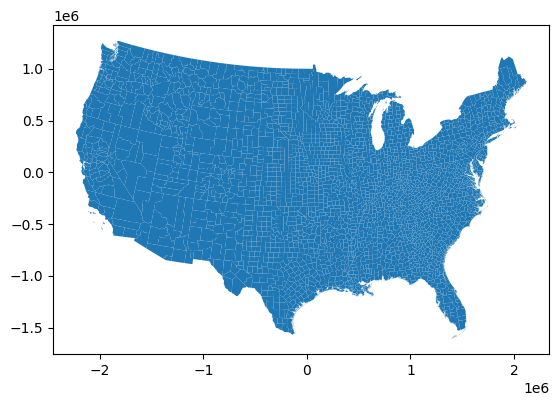

In [2]:
# Read and clean data.

# Read data containing county polygons. 
data = gpd.read_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_County_Elections_Projected')
data.plot()

print(data.shape)


In [3]:
# Rename columns 

data.rename(columns={'county_f_1': 'county_FIPS',
                     'pop_sqmi':'population_persqmile',
                     'totalvotes':'totalvotes_2008',
                     'totalvot_1':'totalvotes_2012',
                     'totalvot_2':'totalvotes_2016',
                     'totalvot_3':'totalvotes_2020',
                     'cvap_est_2':'cvap_est_2008',
                     'cvap_est_3':'cvap_est_2012',
                     'cvap_est_4':'cvap_est_2016',
                     'cvap_est_5':'cvap_est_2020',
                     'voter_turn':'voter_turnout_2008',
                     'voter_tu_1':'voter_turnout_2012',
                     'voter_tu_2':'voter_turnout_2016',
                     'voter_tu_3':'voter_turnout_2020',
                     'voter_tu_4':'voter_turnout_dem_2008',
                     'voter_tu_5':'voter_turnout_dem_2012',
                     'voter_tu_6':'voter_turnout_dem_2016',
                     'voter_tu_7':'voter_turnout_dem_2020',
                     'voter_tu_8':'voter_turnout_gop_2008',
                     'voter_tu_9':'voter_turnout_gop_2012',
                     'voter_t_10':'voter_turnout_gop_2016',
                     'voter_t_11':'voter_turnout_gop_2020',
                     'pctdiff_de':'per_diff_dem_vs_gop_2008',
                     'pctdiff__1':'per_diff_dem_vs_gop_2012',
                     'pctdiff__2':'per_diff_dem_vs_gop_2016',
                     'pctdiff__3':'per_diff_dem_vs_gop_2020',
                     'rawdiff_de':'rawdiff_dem_vs_gop_2008',
                     'rawdiff__1':'rawdiff_dem_vs_gop_2012',
                     'rawdiff__2':'rawdiff_dem_vs_gop_2016',
                     'rawdiff__3':'rawdiff_dem_vs_gop_2020',
                     'winning_pa':'winning_party_2008',
                     'winning__1':'winning_party_2008',
                     'winning__2':'winning_party_2008',
                     'winning__3':'winning_party_2008',
                     'gender_MED':'2022_median_age',
                     'householdi':'2022_per_capitalincome',
                     'educationa':'perc_2022_age_25+_no_diploma/highschool',
                     'households':'perc_2022_income_below_povertyline',
                     'educatio_1':'perc_2022_age_25+_with_bachelors_degree',
                     'disposable':'2022_avg_disposable_income',
                     'househol_1':'2022_average_houshold_income',
                     'financial1':'2022_avg_credit_card_debt'
                     },inplace=True)

print(data.columns)

Index(['county_fip', 'fips', 'name', 'population', 'population_persqmile',
       'sqmi', 'state_abbr', 'state_fips', 'state_name', 'county_FIPS',
       'totalvotes_2008', 'totalvotes_2012', 'totalvotes_2016',
       'totalvotes_2020', 'cvap_est_2008', 'cvap_est_2012', 'cvap_est_2016',
       'cvap_est_2020', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', 'voter_turnout_dem_2008',
       'voter_turnout_dem_2012', 'voter_turnout_dem_2016',
       'voter_turnout_dem_2020', 'voter_turnout_gop_2008',
       'voter_turnout_gop_2012', 'voter_turnout_gop_2016',
       'voter_turnout_gop_2020', 'per_diff_dem_vs_gop_2008',
       'per_diff_dem_vs_gop_2012', 'per_diff_dem_vs_gop_2016',
       'per_diff_dem_vs_gop_2020', 'rawdiff_dem_vs_gop_2008',
       'rawdiff_dem_vs_gop_2012', 'rawdiff_dem_vs_gop_2016',
       'rawdiff_dem_vs_gop_2020', 'winning_party_2008', 'winning_party_2008',
       'winning_party_2008', 'winning_party_2008', 'aggregatio', 

# Model 1. 

In this model we will be using only three parameters , median age, income and percentage of voters with diploma certificates.
 


In [4]:
# Subset data, get recquired columns 

data1 = data[['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool', 'voter_turnout_2020']]
data1

2022_median_age  2022_per_capitalincome  \
0                39.1                 32233.0   
1                43.3                 37891.0   
2                40.4                 22826.0   
3                39.8                 25152.0   
4                41.3                 28176.0   
...               ...                     ...   
3103             35.5                 37688.0   
3104             39.1                 58009.0   
3105             35.9                 32885.0   
3106             43.2                 30448.0   
3107             43.7                 33282.0   

      perc_2022_age_25+_no_diploma/highschool  voter_turnout_2020  
0                                        7.53            0.632502  
1                                        5.77            0.627867  
2                                       16.10            0.535949  
3                                       12.53            0.542704  
4                                        9.49            0.632245  
...                                       ...                 ...  
3103                                     3.64            0.555581  
3104                                     1.93            0.855977  
3105                                     3.11            0.665892  
3106                                     4.82            0.672560  
3107                                     2.59            0.657433  

[3108 rows x 4 columns]

In [5]:
# Check missing values 

data1.isna().sum()

2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
voter_turnout_2020                         0
dtype: int64

In [6]:
# Define training features
X = data1.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define labels 
y = data1[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  
0                                     7.53  
1                                     5.77  
2                                    16.10  
3                                    12.53  
4                                     9.49  

 Labels : 
    voter_turnout_2020
0            0.632502
1            0.627867
2            0.535949
3            0.542704
4            0.632245


In [7]:
# Fit a deciosion tree regressor to the dataset 

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)
 
# Create a regressor object 
rg = DecisionTreeRegressor()

# Train the model, fit the model ,gain knowledge of the data 
rg.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
# Predict values using test and train data 

y_pred1 = rg.predict(X_train)
y_pred = rg.predict(X_test)

In [9]:
# Evaluate the model using Mean Absolute Error. 
# This error calculates the difference between actual value and predicted values by averaging the distance between 
# each pair of values. 

t1 = mean_absolute_error(y_test, y_pred)
t2 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t1}')
print(f'MAE of Decision Tree Regressor on train data : {t2}')

MAE of Decision Tree Regressor on test set : 0.07410096420394428
MAE of Decision Tree Regressor on train data : 0.0


The MAE on the training set is 0.000 meaning its overfitting, while the test set MAE is better(low MEA) meaning its generalising new data well. Lets apply pre-pruning to the tree by setting the maximum depth which limits the depth of trees and observe the outcome.

We expect a higher MEA on the training set while the test set improves.  

In [10]:
# Create a regressor object maximum tree depth of 11
rg2 = DecisionTreeRegressor(random_state=8, max_depth=11)

# Train the model, fit the model ,gain knowledge of the data 
rg2.fit(X_train, y_train)

# Predict values using test and train data 
y_pred1 = rg2.predict(X_train)
y_pred = rg2.predict(X_test)

# MEA
t3 = mean_absolute_error(y_test, y_pred)
t4 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t3}')
print(f'MAE of Decision Tree Regressor on train data : {t4}')

MAE of Decision Tree Regressor on test set : 0.06228558534183752
MAE of Decision Tree Regressor on train data : 0.03025545760430417


Tree depth did not significantly impact MEA on test data but had minimal increase on training data illustrating that it slightly did not memorise data.  

## Feature Importance.

Lets evaluate the impact of each feature in the dataset, how did they contribute to the model. This value usually sums to 1. 0 means the feature was nit used at all while 1 means it perfectly predicted the target variable. 


In [11]:
print("Feature importances:\n{}".format(rg2.feature_importances_))

Feature importances:
[0.25924555 0.52055787 0.22019658]


The 'perc_2022_age_25+_no_diploma/highschool' and '2022_per_capitalincome' variables had the most importance meaning they were the most usefull in predicting voter turn out. 

## Tune Hyperparameters with GridSearchCV.

We can tune various parameters to find the optimal values for our model. Because there is no way of knowing in advance the best parameters, we have to give it a try with different values every time. This manual operation is very tiresome and time cobnsuming, and thats where GridSearchCV comes in handy. It automates this process by looping through the predefined parameters, fit our estimator and selects the best among them. 


In [12]:

parameters = {'max_depth':[6, 7, 8, 9, 10, 11, 12, 13, 14],
              'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56, 60],
              'max_features':[10, 12, 14, 16, 18, 20, 22, 24, 26]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg3 = DecisionTreeRegressor()
rg3 = GridSearchCV(rg3, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg3.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56,
                                            60]})

In [13]:
# Get the best parameters 

rg3.best_params_

{'max_depth': 6, 'max_features': 14, 'max_leaf_nodes': 36}

In [14]:
# Predict values using test and train data 
y_pred1 = rg2.predict(X_train)
y_pred = rg2.predict(X_test)

# MEA
t5 = mean_absolute_error(y_test, y_pred)
t6 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t5}')
print(f'MAE of Decision Tree Regressor on train data : {t6}')

MAE of Decision Tree Regressor on test set : 0.06228558534183752
MAE of Decision Tree Regressor on train data : 0.03025545760430417


# Model 2. 

Lets add more variables to our model. 



In [7]:
data2 = data[['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool', 'voter_turnout_2020', 
               'population_persqmile', 'voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016',
                'perc_2022_income_below_povertyline', '2022_avg_credit_card_debt',
              'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income', 'maritalsta',]]


In [16]:
# Check missing values 

print(data2.isna().sum())

print(f'\n -------------- \n Data types : {data2.dtypes}')

2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
voter_turnout_2020                         0
population_persqmile                       0
voter_turnout_2008                         0
voter_turnout_2012                         0
voter_turnout_2016                         0
perc_2022_income_below_povertyline         0
2022_avg_credit_card_debt                  0
perc_2022_age_25+_with_bachelors_degree    0
2022_avg_disposable_income                 0
maritalsta                                 0
dtype: int64

In [17]:
# Define training features
X = data2.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define labels 
y = data2[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  population_persqmile  \
0                                     7.53                  97.3   
1                                     5.77                 141.9   
2                                    16.10                  27.9   
3                                    12.53                  35.6   
4                                     9.49                  90.9   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   
2            0.556459            0.558418            0.523712   
3            0.500521           

In [19]:
parameters = {'max_depth':[6, 7, 8, 9, 10, 11, 12, 13, 14],
              'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56, 60],
              'max_features':[10, 12, 14, 16, 18, 20, 22, 24, 26]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg4 = DecisionTreeRegressor()
rg4 = GridSearchCV(rg4, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg4.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56,
                                            60]})

In [20]:
# Get the best parameters 
rg4.best_params_

{'max_depth': 6, 'max_features': 16, 'max_leaf_nodes': 44}

In [21]:
# Predict values using test and train data 
y_pred1 = rg4.predict(X_train)
y_pred = rg4.predict(X_test)

# MEA
t7 = mean_absolute_error(y_test, y_pred)
t8 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t7}')
print(f'MAE of Decision Tree Regressor on train data : {t8}')

MAE of Decision Tree Regressor on test set : 0.030662928773724576
MAE of Decision Tree Regressor on train data : 0.026056765192363284


In [101]:
# R2 score

#print(rg4.score(y_test, y_pred))  # Synonymous to classification report in classifications

In [23]:
X.columns

Index(['2022_median_age', '2022_per_capitalincome',
       'perc_2022_age_25+_no_diploma/highschool', 'population_persqmile',
       'voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016',
       'perc_2022_income_below_povertyline', '2022_avg_credit_card_debt',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'maritalsta'],
      dtype='object')

In [24]:
rg4.best_estimator_.feature_importances_

array([0.00502694, 0.00831954, 0.00298038, 0.00817375, 0.        ,
       0.00676707, 0.94237609, 0.00539118, 0.00132132, 0.00693672,
       0.00453027, 0.00817675])

In [25]:
# Feature importance 

hd = list(X.columns)
for i, f in zip(hd, rg4.best_estimator_.feature_importances_):
     print(i,round(f*100,2))

2022_median_age 0.5
2022_per_capitalincome 0.83
perc_2022_age_25+_no_diploma/highschool 0.3
population_persqmile 0.82
voter_turnout_2008 0.0
voter_turnout_2012 0.68
voter_turnout_2016 94.24
perc_2022_income_below_povertyline 0.54
2022_avg_credit_card_debt 0.13
perc_2022_age_25+_with_bachelors_degree 0.69
2022_avg_disposable_income 0.45
maritalsta 0.82


In [26]:
# Feature importance 

features = pd.DataFrame(rg4.best_estimator_.feature_importances_, index=X.columns)
features

# # Plot bar chart
# sns.barplot(x = 'who',
#             y = 'fare',
#             data = features)

0
2022_median_age                          0.005027
2022_per_capitalincome                   0.008320
perc_2022_age_25+_no_diploma/highschool  0.002980
population_persqmile                     0.008174
voter_turnout_2008                       0.000000
voter_turnout_2012                       0.006767
voter_turnout_2016                       0.942376
perc_2022_income_below_povertyline       0.005391
2022_avg_credit_card_debt                0.001321
perc_2022_age_25+_with_bachelors_degree  0.006937
2022_avg_disposable_income               0.004530
maritalsta                               0.008177

# Model 3.

## Distance Feature Engineering. 
In this model, we intend to add a distance variable that describes the urban and rural characteristics of a county to understand the effect it has on voter turnout. Cities in the US are classified based on population, i.e cities 10 are more populous than cities 6. We need to determine the distance between a county to each class of a city, rural counties are far flung while urban ones are closer to cities. 

In [4]:
# Subset original data with columns need
data3 = data[['2022_median_age', '2022_per_capitalincome', 'fips', 'voter_turnout_2020', 'voter_turnout_2008',
              'voter_turnout_2012', 'voter_turnout_2016', 'perc_2022_age_25+_with_bachelors_degree', 'state_abbr',
              '2022_avg_disposable_income', 'geometry']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_5520\2353189747.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title = "Legend", fontsize="15") # Legend


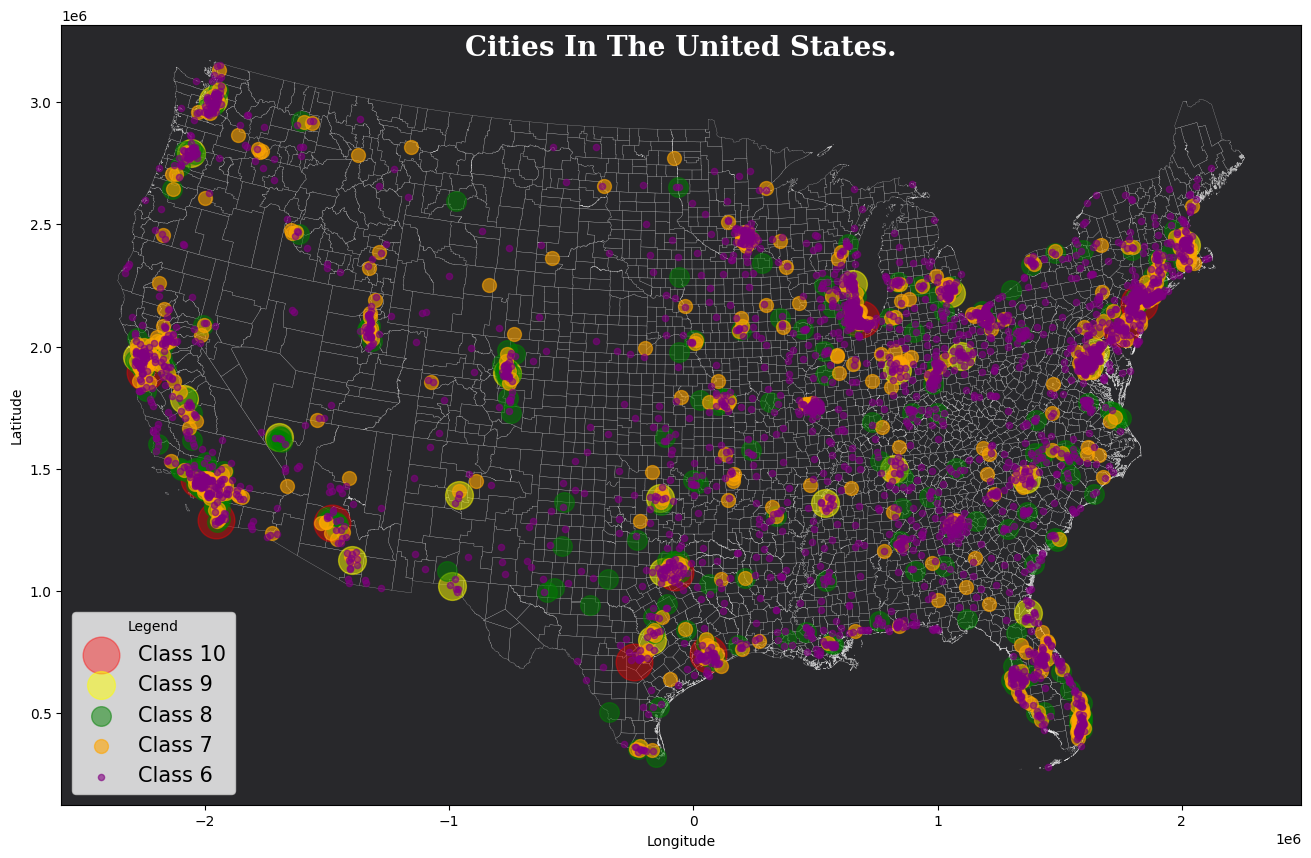

In [5]:
# Read cities data 

cities_10 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_10.shp")
cities_9 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_9.shp")
cities_8 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_8.shp")
cities_7 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_7.shp")
cities_6 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_6.shp")

# Reproject to projected crs(metric), uses meters 
polygon = data3.to_crs(epsg=5069)
cities_10 = cities_10.to_crs(epsg=5069)
cities_9 = cities_9.to_crs(epsg=5069)
cities_8 = cities_8.to_crs(epsg=5069)
cities_7 = cities_7.to_crs(epsg=5069)
cities_6 = cities_6.to_crs(epsg=5069)

fig, ax = plt.subplots(figsize=(16, 12))
polygon.plot(ax=ax, color='#28282B', edgecolor='white', linewidth=0.2, alpha=0.6, label='County')
cities_10.plot(ax=ax, marker='o', color='red', markersize = 700, alpha=0.4, label='Class 10')
cities_9.plot(ax=ax, marker='o', color='yellow', markersize=400, alpha=0.5, label='Class 9')
cities_8.plot(ax=ax, marker='o', color='green', markersize=200, alpha=0.5, label='Class 8')
cities_7.plot(ax=ax, marker='o', color='orange', markersize=100, alpha=0.6, label='Class 7')
cities_6.plot(ax=ax, marker='o', color='purple', markersize=20, alpha=0.6, label='Class 6')

plt.legend(title = "Legend", fontsize="15") # Legend
plt.title("Cities In The United States.", fontsize=20, fontweight='bold', fontfamily='serif', y=0.95, color='white')  # Title 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_facecolor('#28282B')  # Background colour of plot area
plt.show()

### Neighborhood Analysis. 
Find the closest city to each polygon in all the classes then find the distance. All geopandas operaiona are planar, meaning the do not have a third dimension and use projected coordinate system that uses meters as units. Geographic system results in errors since it uses a cartesian coordinate that is suited for angular distances. 


In [6]:
# Lets design a function that takes in a city layer, polygon and class then generates the distance between them.
# Counties that intersect with cities have distance 0

def closest_city(counties, cities, size):

    # Perform a nearest join , find the closest city to each polygon, include distance column 
    # Output is an union of both layers with and added distance column.
    # N\B - the geometry of the second layer, in this case points, is not included
    # When a layer intersects with a point distance will be 0
    cities_w_counties = gpd.sjoin_nearest(counties, cities, distance_col="distances")

    # Divide distances by 1000 to get km units
    cities_w_counties.distances = cities_w_counties.distances / 1000

    # Filter columns , get geometry column of counties and the distance to nearest city
    # Also unique columns to identify both county(fips) and city(placefips) 
    cities_w_counties = cities_w_counties[['fips', 'geometry', 'PLACEFIPS', 'distances']]


    #------------------------------------------------------------------------
    # --------------      Merge operation     -------------------------------
    #------------------------------------------------------------------------
   
    # Get the geometry of the second layer with an inner join with points layer
    merged = pd.merge(cities_w_counties, cities, how="inner", on=["PLACEFIPS", "PLACEFIPS"])

    # Filter columns, remove all columns from point layer except geometry and distance of point
    # Geometry of polygon layer is removed to prevent complications during merging of data later 
    merged = merged[['fips', 'PLACEFIPS', 'geometry_y', 'distances']] 

    # Rename columns 
    merged.rename(columns={'geometry_x':'geometry_polygon'}, inplace=True)

    # Rename distance column
    if size == 10 :
        merged.rename(columns={'distances':'distances_10', 
                               'geometry_y':'geometry_point_10',
                               'PLACEFIPS':'PLACEFIPS_10'}, inplace=True)
    elif size == 9:
        merged.rename(columns={'distances':'distances_9', 
                               'geometry_y':'geometry_point_9',
                               'PLACEFIPS':'PLACEFIPS_9'}, inplace=True)
    elif size == 8:
        merged.rename(columns={'distances':'distances_8', 
                               'geometry_y':'geometry_point_8',
                               'PLACEFIPS':'PLACEFIPS_8'}, inplace=True)
    elif size == 7:
        merged.rename(columns={'distances':'distances_7', 
                               'geometry_y':'geometry_point_7',
                               'PLACEFIPS':'PLACEFIPS_7'}, inplace=True)
    else :
        merged.rename(columns={'distances':'distances_6', 
                               'geometry_y':'geometry_point_6',
                               'PLACEFIPS':'PLACEFIPS_6'}, inplace=True)


    # Return two tables, one with distance only and another with both geoms and distance 
    return cities_w_counties, merged


# Call function passing county layer, city points, and city class, then assign values to variables 
county_dist_10, merged_geom_10 = closest_city(polygon, cities_10, 10)
county_dist_9, merged_geom_9 = closest_city(polygon, cities_9, 9)
county_dist_8, merged_geom_8 = closest_city(polygon, cities_8, 8)
county_dist_7, merged_geom_7 = closest_city(polygon, cities_7, 7)
county_dist_6, merged_geom_6 = closest_city(polygon, cities_6, 6)

In [7]:
# Table with distance and polygon geom 

print(f'Table of polygon with distances : \n {county_dist_10.head(2)} \n\n')
print(f'colums : {county_dist_10.columns}')

Table of polygon with distances : 
     fips                                           geometry PLACEFIPS  \
0  01001  MULTIPOLYGON (((892123.045 1115620.999, 892462...   4835000   
1  01003  MULTIPOLYGON (((813031.992 840007.836, 813055....   4835000   

    distances  
0  861.072768  
1  709.058633   


colums : Index(['fips', 'geometry', 'PLACEFIPS', 'distances'], dtype='object')


In [8]:
# Table with point geom and distance 

print(f'Table of Polygon with point geom : \n {merged_geom_10.head(2)}')
print(f'\n\n colums : {merged_geom_10.columns}')

Table of Polygon with point geom : 
     fips PLACEFIPS_10             geometry_point_10  distances_10
0  01001      4835000  POINT (61163.317 742758.864)    861.072768
1  01003      4835000  POINT (61163.317 742758.864)    709.058633


 colums : Index(['fips', 'PLACEFIPS_10', 'geometry_point_10', 'distances_10'], dtype='object')


In [9]:
# Calculate centroid of original polygons that will be used to plot a line to closest city 

polygon['poly_centroid'] = polygon.centroid
polygon.columns

Index(['2022_median_age', '2022_per_capitalincome', 'fips',
       'voter_turnout_2020', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'perc_2022_age_25+_with_bachelors_degree',
       'state_abbr', '2022_avg_disposable_income', 'geometry',
       'poly_centroid'],
      dtype='object')

In [10]:
# Merge data from all classes of cities to polygon to form a single table using chain operation 

merged = polygon.merge(merged_geom_10, on='fips', how='inner')\
        .merge(merged_geom_9, on='fips', how='inner')\
        .merge(merged_geom_8, on='fips', how='inner')\
        .merge(merged_geom_7, on='fips', how='inner')\
        .merge(merged_geom_6, on='fips', how='inner')
print(data3.head(2))

print(f'\n------------------------------\n columns {data3.columns}')



   2022_median_age  2022_per_capitalincome   fips  voter_turnout_2020  \
0             39.1                 32233.0  01001            0.632502   
1             43.3                 37891.0  01003            0.627867   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   

   perc_2022_age_25+_with_bachelors_degree state_abbr  \
0                                    17.39         AL   
1                                    22.58         AL   

   2022_avg_disposable_income  \
0                     66149.0   
1                     70900.0   

                                            geometry  
0  MULTIPOLYGON (((853217.957 -764213.117, 853569...  
1  MULTIPOLYGON (((779609.014 -1038691.443, 77963...  

------------------------------
 columns Index(['2022_median_age', '2022_per_capitalincome', 'fips',
       'voter_turnout_2020', 'voter_turnout_20

### Visualise distances between polygons and cities.

Create line string between centroid of polygon to the closest class 10 city.

C:\Users\Admin\AppData\Local\Temp\ipykernel_5520\2655064106.py:38: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title = "Legend", fontsize="15") # Add Legend


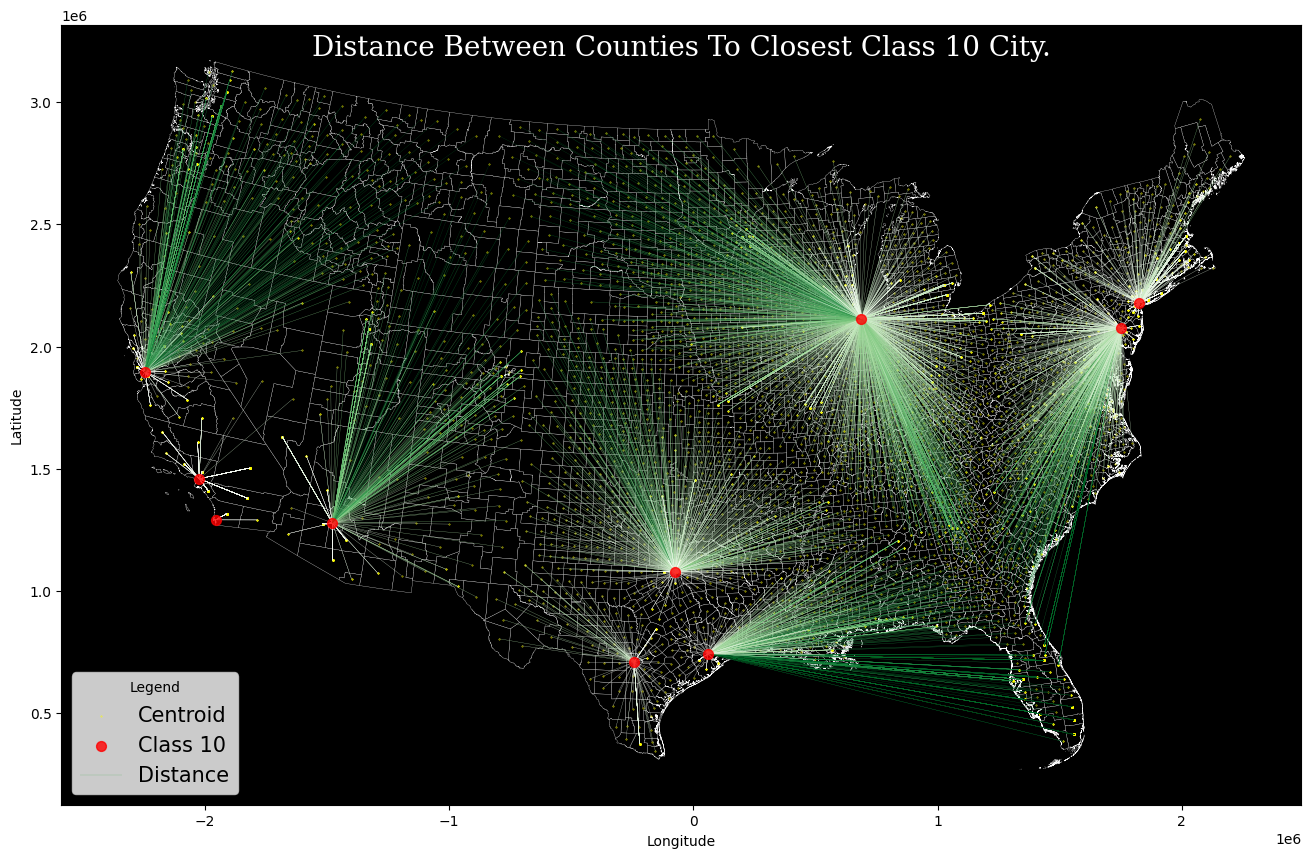

In [13]:
# Create a link (LineString) between centroid of and closest class 10 city
# Loop(apply function) through point geometries and create a line string , using lambda pass then to Linestring function
merged['link'] = merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_10']]), axis=1)

# Set link as the active geometry and then plot 
merged_links = merged.copy()
merged_links = merged_links.set_geometry('link')

# Set centroid as active geometry
merged_centroid = merged.copy()
merged_centroid = merged_centroid.set_geometry('poly_centroid')


# Initaiate Plot 
fig, ax = plt.subplots(figsize=(16, 16))
# Add county polygon 
polygon.plot(ax=ax, 
             color='black',                # Background colour
             edgecolor='white',            # Boundary colour
             linewidth=0.2, alpha=1,       # Line width with low transparency(opaque)
             label='County')

# Add centroid of poligon as yellow point features 
merged_centroid.plot(ax=ax, marker='o', color='yellow', markersize = 0.1, alpha=1, label='Centroid')

# Add class 10 cities as red point features , overlay above links(has higher z order)
cities_10.plot(ax=ax, marker='o', color='red', markersize = 50, alpha=0.8, label='Class 10', zorder=2)

# Add distance line 
merged_links.plot(ax=ax, 
                     # Colour based on distance variable 
                  column='distances_10', cmap = 'Greens', scheme= "equalinterval", 
                  k=10, linewidth=0.2, alpha=0.9, label='Distance', 
                  zorder=1                  # Add below other features 
                 )


plt.legend(title = "Legend", fontsize="15") # Add Legend
plt.title("Distance Between Counties To Closest Class 10 City.", fontfamily='serif',
          fontsize=20, fontweight='medium', color='white', y=0.95)  # Add Title 
   # Label axis 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
   # Background colour of plot area
plt.gca().set_facecolor('black')  
plt.show()

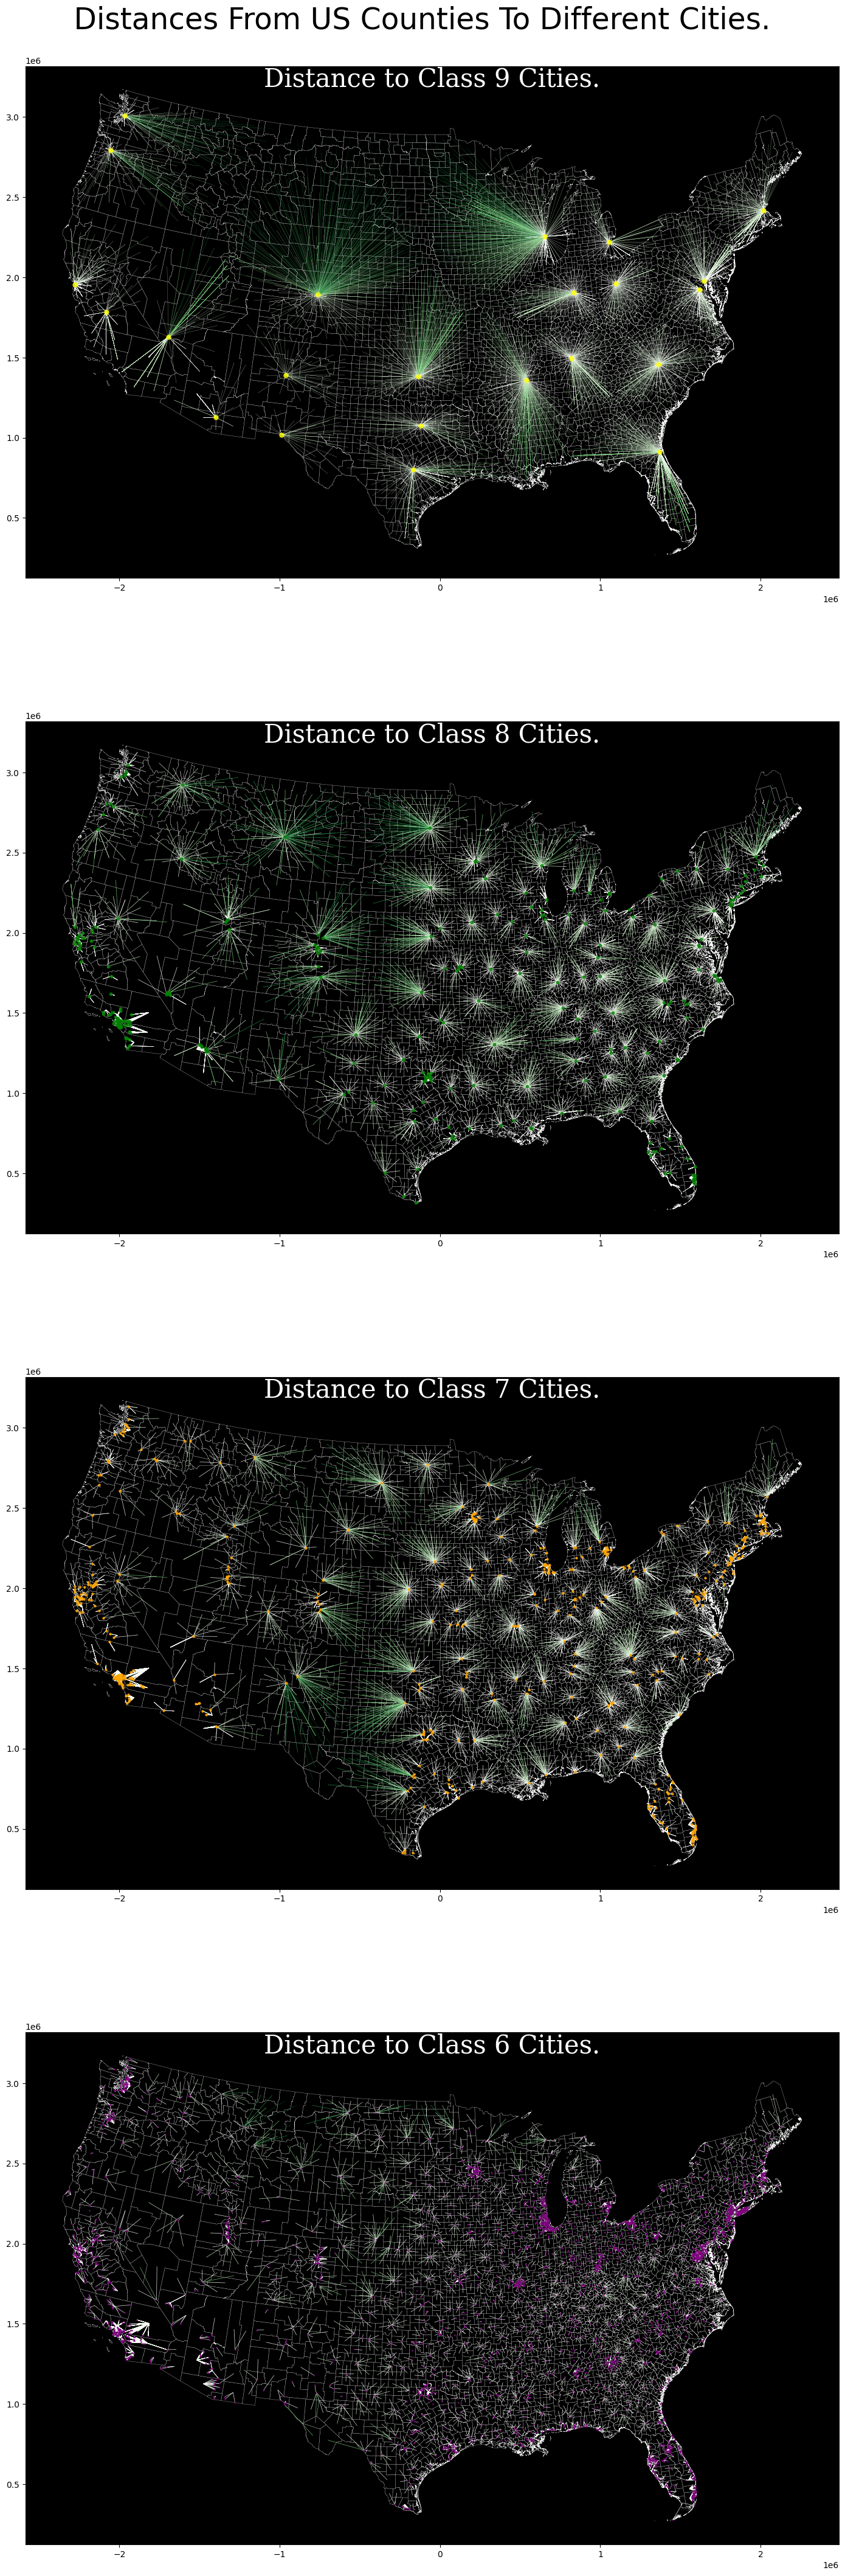

In [14]:
# Visualise all city classes 

# Create line strings between center of polygons to all city classes
merged['link_9'] = merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_9']]), axis=1)
merged['link_8'] = merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_8']]), axis=1)
merged['link_7'] = merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_7']]), axis=1)
merged['link_6'] = merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_6']]), axis=1)


# Set links as the active geometry and then plot 
merged_links = merged.copy()
merged_links9 = merged_links.set_geometry('link_9')
merged_links8 = merged_links.set_geometry('link_8')
merged_links7 = merged_links.set_geometry('link_7')
merged_links6 = merged_links.set_geometry('link_6')


# initiate plot 
fig, axes = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(14, 44))
# Add title to subplot
fig.suptitle(' Distances From US Counties To Different Cities. ', fontsize=35)


# Class 9 cities 
polygon.plot(ax=axes[0], color='black', edgecolor='white', linewidth=0.2, alpha=1, label='County')
merged_links9.plot(ax=axes[0], column='distances_9', cmap = 'Greens', scheme= "equalinterval", # Colour based on distance 
                 linewidth=0.2, alpha=0.9, label='Distance', zorder=1)
cities_9.plot(ax=axes[0], marker='o', color='yellow', markersize = 25, alpha=0.8, label='Class 9', zorder=2)
axes[0].set_title("Distance to Class 9 Cities.", fontweight="medium", size=30, y=0.95, color='white'
                  , fontfamily='serif')
axes[0].set_facecolor('black')


# Class 8 cities 
polygon.plot(ax=axes[1], color='black', edgecolor='white', linewidth=0.2, alpha=1, label='County')
merged_links8.plot(ax=axes[1], column='distances_8', cmap = 'Greens', scheme= "equalinterval", # Colour based on distance 
                linewidth=0.5, alpha=0.9, label='Distance', zorder=1)
cities_8.plot(ax=axes[1], marker='o', color='green', markersize = 10, alpha=0.8, label='Class 8', zorder=2)
axes[1].set_title("Distance to Class 8 Cities.", fontweight="medium", size=30, y=0.95, color='white'
                  , fontfamily='serif')
axes[1].set_facecolor('black')


# Class 7 cities 
polygon.plot(ax=axes[2], color='black', edgecolor='white', linewidth=0.2, alpha=1, label='County')
merged_links7.plot(ax=axes[2], column='distances_7', cmap = 'Greens', scheme= "equalinterval", # Colour based on distance 
                 linewidth=0.5, alpha=0.9, label='Distance', zorder=1)
cities_7.plot(ax=axes[2], marker='o', color='orange', markersize = 5, alpha=0.8, label='Class 7', zorder=2)
axes[2].set_title("Distance to Class 7 Cities.", fontweight="medium", size=30, y=0.95, color='white'
                  , fontfamily='serif')
axes[2].set_facecolor('black')


# Class 6 cities 
polygon.plot(ax=axes[3], color='black', edgecolor='white', linewidth=0.2, alpha=1, label='County')
merged_links6.plot(ax=axes[3], column='distances_6', cmap = 'Greens', scheme= "equalinterval", # Colour based on distance 
                 linewidth=0.5, alpha=0.9, label='Distance', zorder=1)
cities_6.plot(ax=axes[3], marker='o', color='purple', markersize = 1, alpha=0.8, label='Class 6', zorder=2)
axes[3].set_title("Distance to Class 6 Cities.", fontweight="medium", size=30, y=0.95, color='white'
                  , fontfamily='serif')
axes[3].set_facecolor('black')


# set spacing
fig.tight_layout()
plt.show()


## Design model 3.

After visualising the distance from each county to all classes of cities, we will add this feature into our decision tree model to determine whether it improves voter turn out. A geograhic feature will also be incooperated to study their effects.   

### Feature Selection. 
From previous models, there are features that are redundant to our model design. They include : percentage of poeple with an income below poverty line, median age, percebtage of people with more than 25 years with no diploma, and the average credit card debt. These variables had the lowest score when assessing the influence of previous regression models as observed in model 2 and model 3. Ommiting them from our model will redice computation time and as well as improving on our model predictive performance. Understanding the this process is crucial to the efficacy of our model considering that we will be adding new features such as distance and location. 

### Encoding Geographical Data.
Another key feature that should be analysed on the model is the geographical(state) designation of a county. We must figure a way to include this categorical data into the algorithm so as to view the potential impact. The biggest challenge is turning textual information i.e AZ, CL to a more meaningfull numeriacl data that is understood by the model. There are multiple methods used to encode data, a simple one is label encoding that simply converts a variable into a number. From our data, there are 49 states meaning each will be assigned a different values all in a single column. This technique provides a more compacted data but runs the risk if 'misinterpretation' by the model, i.e if a state is assigned a value 0 and another given 49, the algorithm will easily assign more weight 49X to the later causing huge misrepresentation of real life data. 

To solve this problem, we will take a commonly used design method, One Hot Encoding. It simply comverts a value to binary values either 1(true) or 0(false). The upside to this algorithm, it does not inapproprietly weigh a value but it results to more variables in the dataset increasing complexity. For our data 49 more variable will be added because there are such unique number of values.    

### Feature Scalling.
Pre-processing operation prior to modelling can be a tedious task. A machine learning engineer needs to transfrom data to a format and structure that provides a predictive model condusive enviroment free of errors. Remember these models have different assumptions about the data that and may greatly impact outputs of non-consistent or incompatible data. Feature scalling transforms a numerical features into a common scale by normalising a distribution thus reducing potential biases arising from variations. It also improve the predictive ability of a model by ensuring no single variable has an unwarranted domination in the learning algorithm's output. By scaling the features, we can ensure that they contribute equally to the model’s performance. In some cases, this steps ensures there is a higher levels of convergence speed and performance during modelling. For this study, we will use normalisation technique which transforms feature to values between 1 and 0. 

In [26]:
# Feature Selection.  

# View data 
print(f'sample data : \n {merged.head(2)} \n\n --------------------------------------')

# Filter needed columns that will be fed into our model 
model3_df = merged[['2022_median_age', '2022_per_capitalincome', 'state_abbr', 'voter_turnout_2008', 'voter_turnout_2012',
                    'voter_turnout_2016', 'perc_2022_age_25+_with_bachelors_degree',  '2022_avg_disposable_income',
                   'distances_10','distances_9','distances_8','distances_7','distances_6', 'voter_turnout_2020']]

print(f'sample model data : \n : {model3_df.head(2)} \n\n {model3_df.columns}')


sample data : 
    2022_median_age  2022_per_capitalincome   fips  voter_turnout_2020  \
0             39.1                 32233.0  01001            0.632502   
1             43.3                 37891.0  01003            0.627867   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   

   perc_2022_age_25+_with_bachelors_degree state_abbr  \
0                                    17.39         AL   
1                                    22.58         AL   

   2022_avg_disposable_income  ...                geometry_point_7  \
0                     66149.0  ...  POINT (848508.887 1187576.591)   
1                     70900.0  ...   POINT (842145.330 856383.227)   

  distances_7 PLACEFIPS_6                geometry_point_6  distances_6  \
0   76.553846     0162328  POINT (890535.954 1087742.341)          0.0   
1   17.776386     0132272   POINT (79

In [27]:
# Model features information 

model3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39909 entries, 0 to 39908
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   2022_median_age                          39909 non-null  float64
 1   2022_per_capitalincome                   39909 non-null  float64
 2   state_abbr                               39909 non-null  object 
 3   voter_turnout_2008                       39909 non-null  float64
 4   voter_turnout_2012                       39909 non-null  float64
 5   voter_turnout_2016                       39909 non-null  float64
 6   perc_2022_age_25+_with_bachelors_degree  39909 non-null  float64
 7   2022_avg_disposable_income               39909 non-null  float64
 8   distances_10                             39909 non-null  float64
 9   distances_9                              39909 non-null  float64
 10  distances_8                              39909

In [28]:
# View basic statistics for numeric values .

model3_df.describe().round(2)

2022_median_age  2022_per_capitalincome  voter_turnout_2008  \
count         39909.00                39909.00            39909.00   
mean             37.36                41383.02                0.61   
std               2.75                 6587.30                0.05   
min              22.30                12514.00                0.20   
25%              36.40                41169.00                0.60   
50%              36.40                41169.00                0.60   
75%              37.40                41169.00                0.61   
max              64.60                85462.00                1.00   

       voter_turnout_2012  voter_turnout_2016  \
count            39909.00            39909.00   
mean                 0.55                0.57   
std                  0.05                0.05   
min                  0.18                0.17   
25%                  0.54                0.55   
50%                  0.54                0.55   
75%                  0.57                0.58   
max                  1.00                1.00   

       perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
count                                 39909.00                    39909.00   
mean                                     23.71                    85318.98   
std                                       4.03                    11386.17   
min                                       0.00                    32901.00   
25%                                      24.45                    86253.00   
50%                                      24.45                    86253.00   
75%                                      24.45                    86253.00   
max                                      47.68                   140490.00   

       distances_10  distances_9  distances_8  distances_7  distances_6  \
count      39909.00     39909.00     39909.00     39909.00     39909.00   
mean         160.75       231.97         7.55         6.52         1.44   
std          384.33       106.43        31.28        29.39         8.84   
min            0.00         0.00         0.00         0.00         0.00   
25%            0.00       230.03         0.00         0.00         0.00   
50%            0.00       230.03         0.00         0.00         0.00   
75%           29.49       230.03         0.00         0.00         0.00   
max         1591.88      1054.37       463.57       537.92       269.58   

       voter_turnout_2020  
count            39909.00  
mean                 0.68  
std                  0.04  
min                  0.21  
25%                  0.67  
50%                  0.67  
75%                  0.67  
max                  1.00

### Standardize and encode data. 

Cartegorical data containing state name needs to be encoded into a format that is understood by machine lerning models. This variable is nominal as it has no hierarchy associated with it. This process results to more information for the model thus can improve its quality but it also brings in more variables into the model increasing complexity, dimensionality, and slowing down training. Like in our case there will be new 49 feature correponding to the number of states.  

In [76]:
# Split data 

# Fetch data that needs to be standardised. 
X1 = model3_df.drop(columns=['voter_turnout_2008', 'voter_turnout_2012', 'state_abbr',
                             'voter_turnout_2016', 'voter_turnout_2020'], axis=1)

# Remaining colums already standardised , will be used to merge vertically to form predictor variables 
X2 = model3_df[['voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016']]

# Variable to be predicted 
y = model3_df[['voter_turnout_2020']]

X1

2022_median_age  2022_per_capitalincome  \
0                 39.1                 32233.0   
1                 43.3                 37891.0   
2                 43.3                 37891.0   
3                 43.3                 37891.0   
4                 43.3                 37891.0   
...                ...                     ...   
39904             35.5                 37688.0   
39905             39.1                 58009.0   
39906             35.9                 32885.0   
39907             43.2                 30448.0   
39908             43.7                 33282.0   

       perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
0                                        17.39                     66149.0   
1                                        22.58                     70900.0   
2                                        22.58                     70900.0   
3                                        22.58                     70900.0   
4                                        22.58                     70900.0   
...                                        ...                         ...   
39904                                    17.51                     77322.0   
39905                                    42.90                    104190.0   
39906                                    13.19                     70602.0   
39907                                    18.50                     58243.0   
39908                                    15.92                     67100.0   

       distances_10  distances_9  distances_8  distances_7  distances_6  
0        861.072768   386.960995    10.702483    76.553846     0.000000  
1        709.058633   474.239792     4.233110    17.776386     0.000000  
2        709.058633   474.239792     4.233110    17.776386     0.000000  
3        709.058633   474.239792     4.233110    17.776386     0.000000  
4        709.058633   474.239792     4.233110    17.776386     0.000000  
...             ...          ...          ...          ...          ...  
39904    864.075028   285.327478   156.238154   117.691489     0.000000  
39905   1101.257665   585.687379   196.246618    79.768228    59.766490  
39906    850.443551   449.487669    75.355058    68.223780     0.000000  
39907   1189.973467   457.142901   179.567912    97.268088    70.879469  
39908   1276.595364   421.767375   323.993387    66.167900    36.067034  

[39909 rows x 9 columns]

In [77]:
# Normalisation, scales data using minimum and maximum values. 

scaleMinMax = MinMaxScaler(feature_range=(0, 1))

X1 = scaleMinMax.fit_transform(X1)
X1 = pd.DataFrame(X1, columns=['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_with_bachelors_degree',
                               '2022_avg_disposable_income', 'distances_10', 'distances_9', 'distances_8', 
                                'distances_7', 'distances_6' ])

In [78]:
# Scaled data 

print(f'Scaled columns : \n {X1.head(2)}')

Scaled columns : 
    2022_median_age  2022_per_capitalincome  \
0         0.397163                0.270316   
1         0.496454                0.347878   

   perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
0                                 0.364723                    0.309028   
1                                 0.473574                    0.353187   

   distances_10  distances_9  distances_8  distances_7  distances_6  
0      0.540914     0.367007     0.023087     0.142316          0.0  
1      0.445421     0.449785     0.009131     0.033047          0.0  


In [79]:
print(f'Data description : \n {X1.describe().round(3)}')

Data description : 
        2022_median_age  2022_per_capitalincome  \
count        39909.000               39909.000   
mean             0.356                   0.396   
std              0.065                   0.090   
min              0.000                   0.000   
25%              0.333                   0.393   
50%              0.333                   0.393   
75%              0.357                   0.393   
max              1.000                   1.000   

       perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
count                                39909.000                   39909.000   
mean                                     0.497                       0.487   
std                                      0.085                       0.106   
min                                      0.000                       0.000   
25%                                      0.513                       0.496   
50%                                      0.513              

In [80]:
# Nominally encode state name data column  

print(f'States : {model3_df['state_abbr'].unique()} \n----------------------------\n\n')

# Call the function that encodes data to binary column.
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(model3_df[['state_abbr']])

print(one_hot_encoded)

States : ['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'ID' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH'
 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX'
 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY'] 
----------------------------


       state_abbr_AL  state_abbr_AR  state_abbr_AZ  state_abbr_CA  \
0                1.0            0.0            0.0            0.0   
1                1.0            0.0            0.0            0.0   
2                1.0            0.0            0.0            0.0   
3                1.0            0.0            0.0            0.0   
4                1.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
39904            0.0            0.0            0.0            0.0   
39905            0.0            0.0            0.0            0.0   
39906            0.0            0.0            0.0            0.0   
39907            0.

#### Merge data.

We need to merge standardised and encoded data to original dataframe. 

In [85]:
# Concatenate standardised data , already statndardised, encoded data, and predicted variable together

model3_data = pd.concat([X1, X2, one_hot_encoded, y], axis=1)

# Drop the original categorical columns if there is any 

# View data 
model3_data

2022_median_age  2022_per_capitalincome  \
0             0.397163                0.270316   
1             0.496454                0.347878   
2             0.496454                0.347878   
3             0.496454                0.347878   
4             0.496454                0.347878   
...                ...                     ...   
39904         0.312057                0.345095   
39905         0.397163                0.623663   
39906         0.321513                0.279254   
39907         0.494090                0.245846   
39908         0.505910                0.284696   

       perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
0                                     0.364723                    0.309028   
1                                     0.473574                    0.353187   
2                                     0.473574                    0.353187   
3                                     0.473574                    0.353187   
4                                     0.473574                    0.353187   
...                                        ...                         ...   
39904                                 0.367240                    0.412877   
39905                                 0.899748                    0.662605   
39906                                 0.276636                    0.350417   
39907                                 0.388003                    0.235545   
39908                                 0.333893                    0.317867   

       distances_10  distances_9  distances_8  distances_7  distances_6  \
0          0.540914     0.367007     0.023087     0.142316     0.000000   
1          0.445421     0.449785     0.009131     0.033047     0.000000   
2          0.445421     0.449785     0.009131     0.033047     0.000000   
3          0.445421     0.449785     0.009131     0.033047     0.000000   
4          0.445421     0.449785     0.009131     0.033047     0.000000   
...             ...          ...          ...          ...          ...   
39904      0.542800     0.270614     0.337031     0.218792     0.000000   
39905      0.691795     0.555486     0.423335     0.148291     0.221700   
39906      0.534237     0.426309     0.162553     0.126830     0.000000   
39907      0.747525     0.433570     0.387357     0.180824     0.262923   
39908      0.801940     0.400018     0.698906     0.123008     0.133788   

       voter_turnout_2008  ...  state_abbr_TN  state_abbr_TX  state_abbr_UT  \
0                0.621968  ...            0.0            0.0            0.0   
1                0.622114  ...            0.0            0.0            0.0   
2                0.622114  ...            0.0            0.0            0.0   
3                0.622114  ...            0.0            0.0            0.0   
4                0.622114  ...            0.0            0.0            0.0   
...                   ...  ...            ...            ...            ...   
39904            0.570610  ...            0.0            0.0            0.0   
39905            0.818477  ...            0.0            0.0            0.0   
39906            0.598294  ...            0.0            0.0            0.0   
39907            0.679934  ...            0.0            0.0            0.0   
39908            0.611280  ...            0.0            0.0            0.0   

       state_abbr_VA  state_abbr_VT  state_abbr_WA  state_abbr_WI  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
39904            0.0            0.0            0.0            0.0   
39905            0.0            0.0            0.0            0.0  

### Predict model using new variables. 

In [88]:
# Define training features
X = model3_data.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()} \n --------------------------------------------\n ')

# Define labels 
y = model3_data[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0         0.397163                0.270316   
1         0.496454                0.347878   
2         0.496454                0.347878   
3         0.496454                0.347878   
4         0.496454                0.347878   

   perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
0                                 0.364723                    0.309028   
1                                 0.473574                    0.353187   
2                                 0.473574                    0.353187   
3                                 0.473574                    0.353187   
4                                 0.473574                    0.353187   

   distances_10  distances_9  distances_8  distances_7  distances_6  \
0      0.540914     0.367007     0.023087     0.142316          0.0   
1      0.445421     0.449785     0.009131     0.033047          0.0   
2      0.445421     0.449785     0.009131  

In [96]:
# Fit a decision tree regressor to the dataset 

parameters = {'max_depth':[10, 11, 12, 13, 14],
              'max_leaf_nodes': [60, 70, 80, 90, 100],
              'max_features':[26, 34, 44, 52, 60]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg5 = DecisionTreeRegressor()
rg5 = GridSearchCV(rg5, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg5.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'max_features': [26, 34, 44, 52, 60],
                         'max_leaf_nodes': [60, 70, 80, 90, 100]})

In [97]:
# Get the best parameters 
rg5.best_params_

{'max_depth': 12, 'max_features': 44, 'max_leaf_nodes': 100}

In [98]:
# Predict values using test and train data 
y_pred1 = rg5.predict(X_train)
y_pred = rg5.predict(X_test)

# MEA
t9 = mean_absolute_error(y_test, y_pred)
t10 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t9}')
print(f'MAE of Decision Tree Regressor on train data : {t10}')

MAE of Decision Tree Regressor on test set : 0.0033893827663078954
MAE of Decision Tree Regressor on train data : 0.0027869332448164953


In [99]:
X.columns

Index(['2022_median_age', '2022_per_capitalincome',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'distances_10', 'distances_9', 'distances_8', 'distances_7',
       'distances_6', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'state_abbr_AL', 'state_abbr_AR', 'state_abbr_AZ',
       'state_abbr_CA', 'state_abbr_CO', 'state_abbr_CT', 'state_abbr_DC',
       'state_abbr_DE', 'state_abbr_FL', 'state_abbr_GA', 'state_abbr_IA',
       'state_abbr_ID', 'state_abbr_IL', 'state_abbr_IN', 'state_abbr_KS',
       'state_abbr_KY', 'state_abbr_LA', 'state_abbr_MA', 'state_abbr_MD',
       'state_abbr_ME', 'state_abbr_MI', 'state_abbr_MN', 'state_abbr_MO',
       'state_abbr_MS', 'state_abbr_MT', 'state_abbr_NC', 'state_abbr_ND',
       'state_abbr_NE', 'state_abbr_NH', 'state_abbr_NJ', 'state_abbr_NM',
       'state_abbr_NV', 'state_abbr_NY', 'state_abbr_OH', 'state_abbr_OK',
       'state_abbr_OR', 'state_abbr_PA', 'state_abbr_R

In [100]:
rg5.best_estimator_.feature_importances_

array([4.13370236e-03, 2.42221660e-03, 6.83674852e-03, 2.70283913e-02,
       5.71883785e-03, 3.20100626e-03, 5.82206424e-04, 2.81536977e-03,
       1.78877106e-03, 5.04415830e-01, 1.01332640e-01, 3.10603923e-01,
       0.00000000e+00, 0.00000000e+00, 2.26105683e-03, 0.00000000e+00,
       0.00000000e+00, 5.81905714e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.44398038e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.37978692e-04, 0.00000000e+00, 1.00708592e-03, 0.00000000e+00,
       3.01002348e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.79520152e-03, 7.50274374e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.17984164e-04, 0.00000000e+00,
       0.00000000e+00, 2.56994505e-03, 0.00000000e+00, 0.00000000e+00,
      

In [107]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

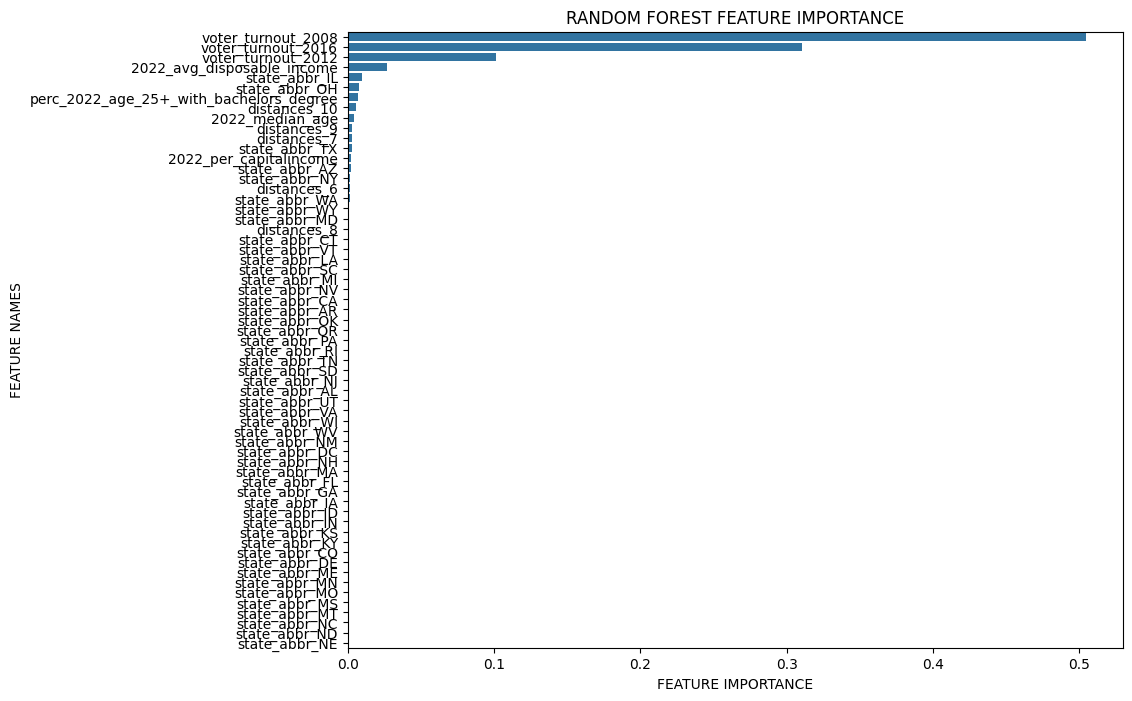

In [108]:
plot_feature_importance(rg5.best_estimator_.feature_importances_, X.columns,'RANDOM FOREST')

#### References 

1. Find nearest point to layer - https://autogis-site.readthedocs.io/en/2019/notebooks/L3/nearest-neighbor-faster.html

2. Create custom points in matplotlib based on population - https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

3. Create link between geometry and point and plot - https://autogis-site.readthedocs.io/en/2019/notebooks/L3/nearest-neighbor-faster.html